# Análisis de la Industria de Videojuegos: Patrones de Éxito y Planificación Estratégica para 2017

---

Este proyecto tiene como objetivo identificar patrones de éxito en la industria de los videojuegos. Para ello, analizaremos un conjunto de datos históricos que abarca hasta finales de 2016. La meta final es utilizar estos hallazgos y las tendencias recientes para planificar campañas publicitarias efectivas para el año 2017, optimizando la estrategia de lanzamiento de juegos.

## Paso 1: Apertura y Estudio General del Archivo de Datos

En esta etapa inicial, cargaremos el dataset y realizaremos una inspección preliminar para comprender su estructura, los tipos de datos que contiene y la presencia de valores ausentes o inconsistencias.

### Acciones a realizar:

1.  **Cargar el dataset:** Importar la librería `pandas` y leer el archivo `games.csv`.
2.  **Mostrar las primeras filas:** Utilizar `df.head()` para visualizar las primeras filas y entender la disposición de los datos.
3.  **Obtener información general del dataset:** Usar `df.info()` para revisar el número de entradas, columnas, tipos de datos y valores no nulos.
4.  **Verificar estadísticas descriptivas:** Emplear `df.describe()` para obtener un resumen estadístico de las columnas numéricas y detectar posibles valores atípicos.

In [ ]:
# Importar pandas
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/content/games.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Obtener información general
print("\nInformación general del dataset:")
df.info()

# Verificar estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

Primeras 5 filas del dataset:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Información general del dataset:
<class 'pandas.core.frame.DataFrame

### Descripción y Observaciones Iniciales del Dataset

Tras cargar y examinar las primeras filas y la información general del dataset, hemos podido identificar las siguientes características y la naturaleza de cada columna:

* **`Name`**: Nombre del videojuego. Es de tipo `object`. Contiene la mayoría de los valores, con muy pocos valores nulos, lo que es esencial para identificar cada juego.
* **`Platform`**: Plataforma en la que se lanzó el juego (ej., Wii, NES, PS2). También es de tipo `object`. Completa, con pocos valores nulos.
* **`Year_of_Release`**: Año de lanzamiento del juego. Originalmente es de tipo `float64`, lo cual es inusual para un año (debería ser entero). Tiene algunos valores nulos que necesitarán ser manejados. Los años van desde 1980 hasta 2016.
* **`Genre`**: Género del juego (ej., Sports, Racing, Role-Playing). Es de tipo `object`. Similar a 'Name', contiene casi todos los valores.
* **`NA_sales`**: Ventas en Norteamérica (en millones de dólares). Tipo `float64`. No contiene valores nulos.
* **`EU_sales`**: Ventas en Europa (en millones de dólares). Tipo `float64`. No contiene valores nulos.
* **`JP_sales`**: Ventas en Japón (en millones de dólares). Tipo `float64`. No contiene valores nulos.
* **`Other_sales`**: Ventas en otras regiones (en millones de dólares). Tipo `float64`. No contiene valores nulos.
* **`Critic_Score`**: Puntuación media de los críticos (de 0 a 100). Tipo `float64`. Presenta una cantidad significativa de valores nulos, lo que indica que no todos los juegos tienen una calificación de crítico.
* **`User_Score`**: Puntuación media de los usuarios (de 0 a 10). Tipo `object`. Este es un punto importante: `df.info()` lo muestra como `object`, probablemente debido a la presencia de valores como 'TBD' (To Be Determined) o texto que no es numérico, además de los valores nulos.
* **`Rating`**: Clasificación de la ESRB (Entertainment Software Rating Board). Tipo `object`. También contiene una cantidad considerable de valores nulos y posiblemente 'TBD', lo que requiere un tratamiento específico.

**Consideraciones para la Preparación de Datos:**

* La columna `Year_of_Release` debe convertirse a un tipo entero.
* Las columnas `User_Score` y `Rating` necesitan un manejo especial para convertir `TBD` a valores nulos y luego `User_Score` a un tipo numérico.
* Se observan valores ausentes en `Name`, `Platform`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, y `Rating`. Será crucial decidir cómo tratarlos para evitar sesgos en el análisis.

---

## Paso 2: Preparación de los Datos

Este paso es fundamental para asegurar la calidad y usabilidad de nuestros datos. Realizaremos ajustes en los nombres de las columnas, convertiremos tipos de datos y manejaremos los valores ausentes.

### Acciones a realizar:

1.  **Renombrar columnas:** Convertir todos los nombres de las columnas a minúsculas para facilitar su manejo.
2.  **Convertir tipos de datos:** Identificar y convertir las columnas al tipo de dato adecuado (ej., numérico para cálculos). **Explicar** por qué se realiza cada cambio.
3.  **Manejo de duplicados:** Identificar y eliminar filas duplicadas para asegurar la unicidad de los registros.
4.  **Manejo de valores ausentes:**
    * **Identificación:** Localizar qué columnas tienen valores ausentes y en qué cantidad.
    * **Estrategias de tratamiento:** Justificar si se rellenan los valores ausentes (y cómo) o si se dejan en blanco. **Explicar** la lógica.
    * **Posibles causas de los valores ausentes:** Reflexionar sobre por qué podrían faltar esos datos (ej., no registrados, errores).
    * **Tratamiento de 'TBD':** Decidir cómo manejar la abreviatura "To Be Determined" en la columna 'Rating' (probablemente como un valor nulo). **Especificar** la decisión.
5.  **Calcular ventas totales:** Crear una nueva columna que sume las ventas de todas las regiones (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`). Esta columna será clave para el análisis del éxito de los juegos.

In [ ]:
# 1. Renombrar columnas a minúsculas
df.columns = df.columns.str.lower()
print("Nombres de columnas después de renombrar:")
print(df.columns)

Nombres de columnas después de renombrar:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [ ]:
# 2. Convertir tipos de datos

# Identificar valores únicos en 'user_score' y 'critic_score' para ver si hay 'TBD' o similares
print("\nValores únicos en user_score antes de la conversión:")
print(df['user_score'].unique())
print("\nValores únicos en critic_score antes de la conversión:")
print(df['critic_score'].unique())

# Convertir 'user_score' a numérico, manejando 'TBD' y otros errores
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print("\nValores únicos en user_score después de la conversión:")
print(df['user_score'].unique())

# Convertir 'year_of_release' a entero, pero primero manejamos los NaN
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

print("\nTipos de datos después de la conversión inicial:")
df.info()



Valores únicos en user_score antes de la conversión:
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Valores únicos en critic_score antes de la conversión:
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 

In [ ]:
# 3. Manejo de duplicados
print("\n--- Manejo de Duplicados ---")
initial_rows = df.shape[0]
print(f"Número inicial de filas: {initial_rows}")

# Identificar duplicados. `subset` podría ser 'name', 'platform', 'year_of_release' para identificar juegos únicos,
df.drop_duplicates(inplace=True)

rows_after_duplicates = df.shape[0]
duplicates_removed = initial_rows - rows_after_duplicates
print(f"Número de filas después de eliminar duplicados: {rows_after_duplicates}")
print(f"Número de duplicados eliminados: {duplicates_removed}")

if duplicates_removed > 0:
    print("\nSe eliminaron filas duplicadas para asegurar la unicidad de los registros.")
else:
    print("\nNo se encontraron filas duplicadas.")



--- Manejo de Duplicados ---
Número inicial de filas: 16715
Número de filas después de eliminar duplicados: 16715
Número de duplicados eliminados: 0

No se encontraron filas duplicadas.


In [ ]:
# 4. Manejo de valores ausentes
print("\nValores ausentes por columna antes del tratamiento:")
print(df.isnull().sum())

# Tratamiento de 'TBD' en 'rating': Si 'rating' contiene 'TBD' como string, lo convertimos a NaN para uniformidad en el análisis de valores ausentes.
df['rating'] = df['rating'].replace('TBD', pd.NA)
print("\nValores ausentes por columna después de reemplazar 'TBD' en 'rating':")
print(df.isnull().sum())

# Ejecutar la eliminación de filas con NaN en columnas clave
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
print("\nValores ausentes después de eliminar filas con NaN en 'name', 'genre', 'year_of_release':")
print(df.isnull().sum())



Valores ausentes por columna antes del tratamiento:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Valores ausentes por columna después de reemplazar 'TBD' en 'rating':
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Valores ausentes después de eliminar filas con NaN en 'name', 'genre', 'year_of_release':
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score     

In [ ]:
# 4. Calcular ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print("\nPrimeras 5 filas con la nueva columna 'total_sales':")
print(df.head())

print("\nInformación final del dataset después de la preparación:")
df.info()


Primeras 5 filas con la nueva columna 'total_sales':
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54 

**Conclusión del Paso 2: Preparación de los Datos**

Hemos completado exitosamente la fase de preparación de datos. Las columnas han sido estandarizadas a minúsculas, facilitando su manejo. Se han realizado conversiones cruciales de tipos de datos, transformando `'year_of_release'` a entero (`Int64`) y las puntuaciones (`'critic_score'`, `'user_score'`) a numéricas (`float64`), lo que permitirá realizar cálculos precisos.

**Se realizó una verificación de filas duplicadas y, en este caso, no se encontraron duplicados, lo que confirma la unicidad de los registros en el dataset.**

El manejo de valores ausentes se realizó de forma estratégica: se eliminaron las filas donde el `name`, `genre` o `year_of_release` eran nulos (reduciendo el dataset a **16444** entradas), ya que son datos fundamentales para la identificación y contextualización de cada juego. Para `'critic_score'`, `'user_score'` y `'rating'`, los valores `NaN` se mantuvieron (incluyendo la conversión de 'TBD' a `NaN`), ya que su ausencia es informativa y rellenarlos podría distorsionar futuros análisis.

Finalmente, se ha añadido la columna `'total_sales'`, unificando las ventas por región en una métrica clave para evaluar el éxito de los títulos. Con todas estas transformaciones, el dataset está ahora limpio, consistente y listo para un análisis exploratorio significativo.

---

## Paso 3: Análisis de Datos Exploratorio (EDA)

### **Paso 3: Análisis de Patrones de Éxito y Tendencias del Mercado (2007-2016)**

En esta fase, analizaremos a fondo el dataset para identificar patrones clave de éxito y las principales tendencias que han marcado la industria de los videojuegos. El objetivo es extraer información práctica que permita detectar proyectos prometedores y planificar campañas publicitarias efectivas para **2017**.

Nos centraremos en el período **2007-2016**, considerado el más relevante debido a la rápida evolución del mercado y los ciclos de vida de las plataformas.

### Acciones a realizar:

1.  **Análisis de juegos por año:**
    * Calcular cuántos juegos fueron lanzados cada año y las ventas totales por año.
    * **Observar:** ¿Hay años con un número inusualmente bajo de lanzamientos o ventas? ¿Coincide esto con la ausencia de datos?
    * **Definir el período de análisis:** Se establecerá un período de tiempo "actual" para el análisis (2007-2016), basándose en la justificación previa.

2.  **Análisis de ventas por plataforma:**
    * Identificar las plataformas con las mayores ventas totales dentro del período de análisis.
    * Analizar cómo las ventas por plataforma cambian a lo largo del tiempo.
    * **Observar:** ¿Qué plataformas son dominantes y cómo ha evolucionado su popularidad?
    * **Visualizar con Diagrama de Caja:** Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
        * **Observar:** ¿Son significativas las diferencias en las ventas entre plataformas? ¿Qué sucede con las ventas promedio y la dispersión?

3.  **Análisis de ventas por género:**
    * Identificar los géneros con las mayores ventas totales dentro del período de análisis.
    * Analizar cómo las ventas por género cambian a lo largo del tiempo.
    * **Observar:** ¿Qué géneros son los más populares y cómo ha evolucionado su popularidad?
    * **Generalizar:** ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

4.  **Impacto de las Reseñas en las Ventas (Plataforma Específica):**
    * **Elegir una plataforma popular** (ej. PS4) y analizar cómo las reseñas de usuarios y profesionales (`user_score`, `critic_score`) afectan sus ventas (`total_sales`).
    * **Visualizar:** Crear gráficos de dispersión para mostrar la relación entre cada tipo de reseña y las ventas para esa plataforma.
    * **Calcular la correlación:** Determinar el coeficiente de correlación entre las reseñas y las ventas.
    * **Concluir:** ¿Las puntuaciones altas realmente se traducen en mayores ventas en esta plataforma? ¿Cuál tipo de reseña tiene una mayor correlación?

5.  **Correlación Global (General):**
    * Aunque se priorizará el análisis por plataforma, se mantendrá una observación general sobre la correlación entre `critic_score`, `user_score` y `total_sales` en el dataset para el período de análisis.
    * **Observar:** ¿Hay diferencias significativas entre las puntuaciones de críticos y usuarios en general? ¿Cómo se relacionan ambas con las ventas?

--- Análisis de Juegos por Año ---

Número de juegos lanzados por año:
year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Ventas totales por año (en millones de USD):
year_of_release
1980     11.38
1981     35.68
1982     28.88
1983     16.80
1984     50.35
1985     53.95
1986     37.08
1987     21.70
1988     47.21
1989     73.45
1990     49.37
1991     32.23
1992     76.16
1993     45.99
1994     79.23
1995     88.12
1996    199.15
1997    201.07
1998    256.31
1999    251.11
2000    201.66
2001    331.46
2002    394.97


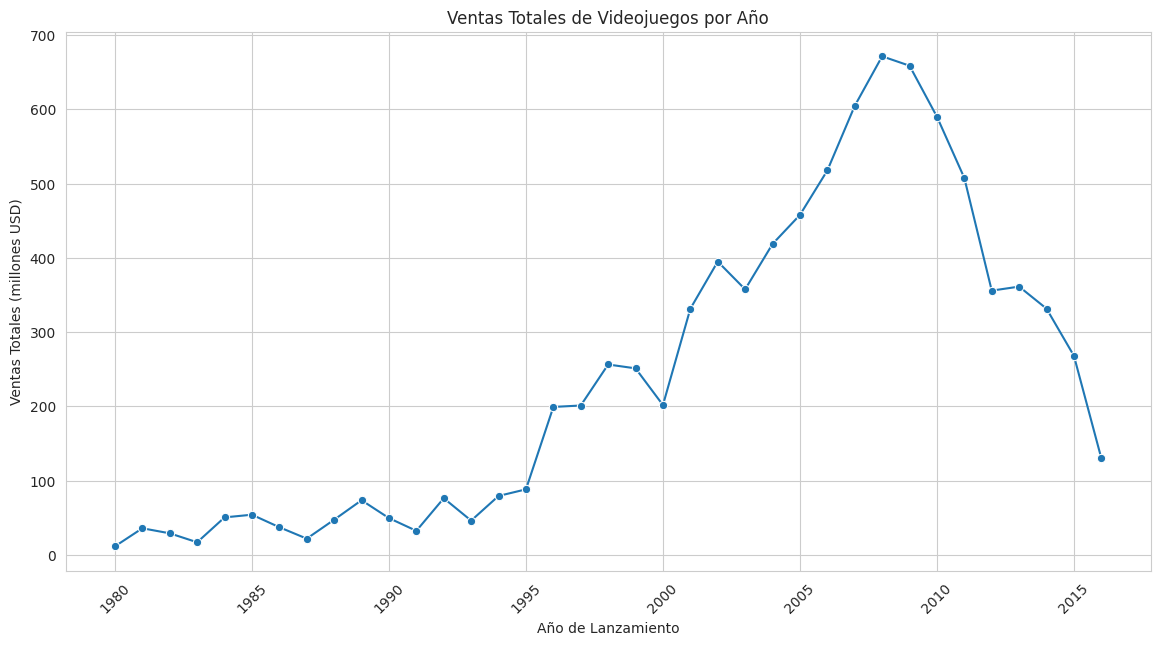


Dataset filtrado para el período actual (desde 2007), tamaño: 9327 filas
A partir de ahora, la mayoría de los análisis se centrarán en este período.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejorar la visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 5) # Tamaño de figura predeterminado

# 1. Análisis de juegos por año
print("--- Análisis de Juegos por Año ---")
games_per_year = df.groupby('year_of_release')['name'].count()
print("\nNúmero de juegos lanzados por año:")
print(games_per_year)

sales_per_year = df.groupby('year_of_release')['total_sales'].sum()
print("\nVentas totales por año (en millones de USD):")
print(sales_per_year)

# Visualización de ventas por año
plt.figure(figsize=(14, 7))
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values, marker='o')
plt.title('Ventas Totales de Videojuegos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Filtrar el periodo de tiempo "actual" # Basado en df.info(), el último año es 2016. Consideraremos 2007-2016 como el período relevante.
current_period_df = df[df['year_of_release'] >= 2007]
print(f"\nDataset filtrado para el período actual (desde 2007), tamaño: {current_period_df.shape[0]} filas")
print("A partir de ahora, la mayoría de los análisis se centrarán en este período.")



--- Análisis de Ventas por Plataforma ---

Plataformas con mayores ventas totales (período actual):
platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
Name: total_sales, dtype: float64


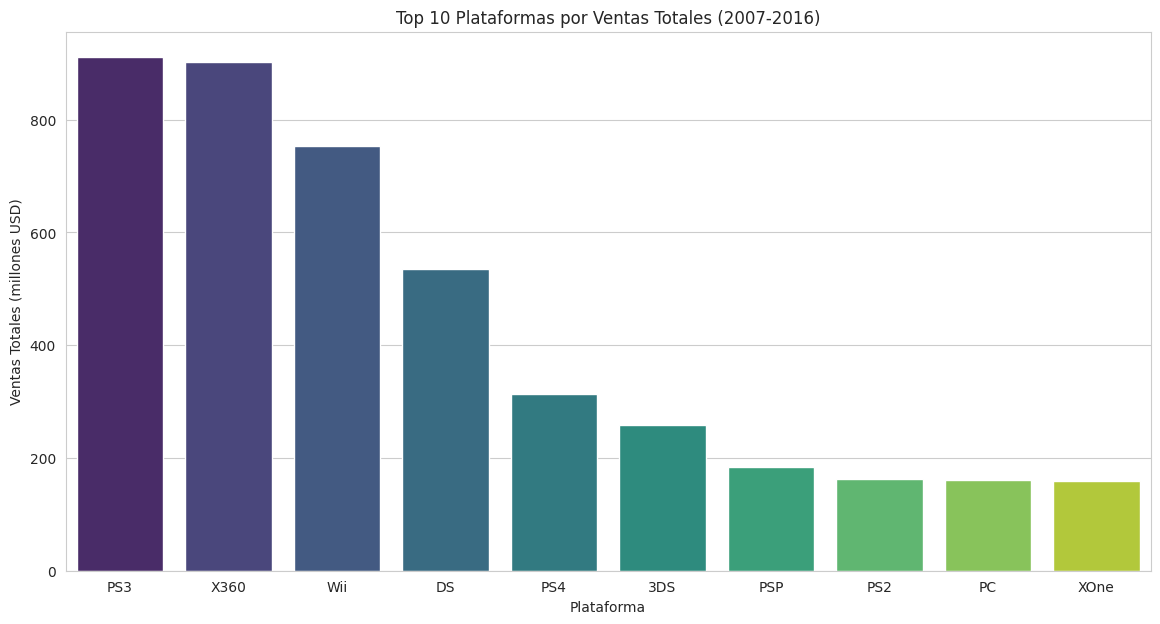

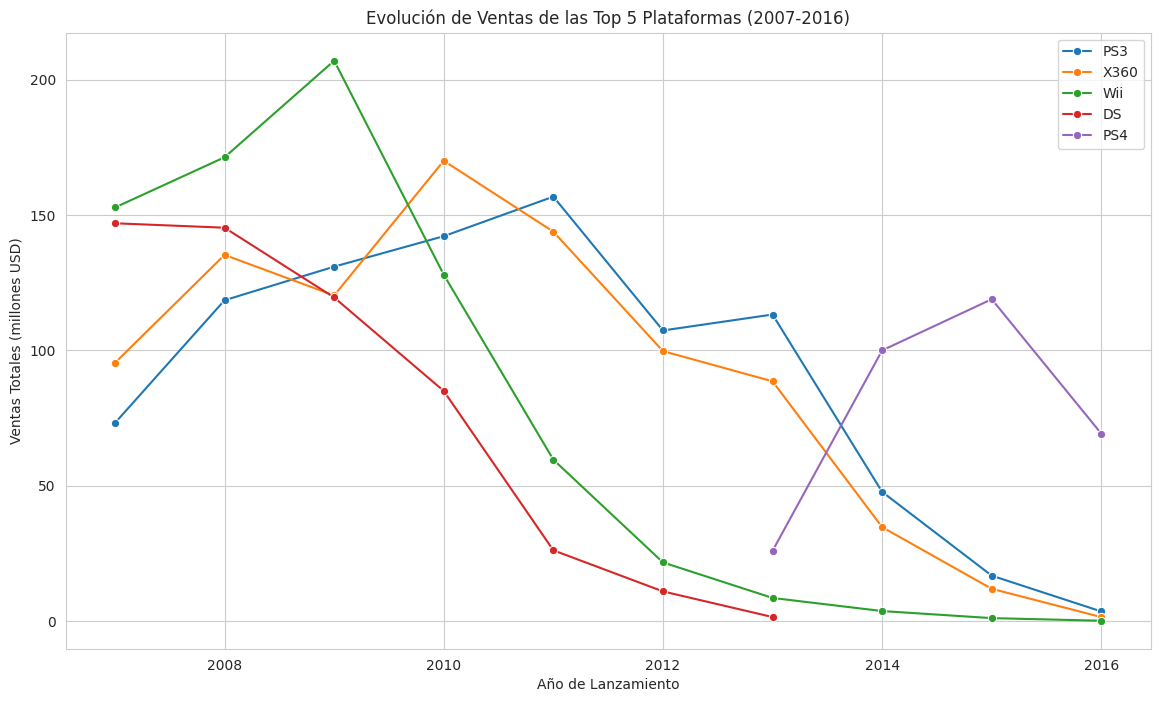

In [ ]:
# 2. Análisis de ventas por plataforma
print("\n--- Análisis de Ventas por Plataforma ---")
platform_sales = current_period_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("\nPlataformas con mayores ventas totales (período actual):")
print(platform_sales.head(10))

# Visualización de las 10 plataformas principales
plt.figure(figsize=(14, 7))
sns.barplot(x=platform_sales.head(10).index, y=platform_sales.head(10).values, palette='viridis', hue=platform_sales.head(10).index, legend=False)
plt.title('Top 10 Plataformas por Ventas Totales (2007-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones USD)')
plt.show()

# Evolución de las ventas de las plataformas principales a lo largo del tiempo
top_platforms = platform_sales.head(5).index # Las 5 plataformas más vendidas
plt.figure(figsize=(14, 8))
for platform in top_platforms:
    platform_data = current_period_df[current_period_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    sns.lineplot(x=platform_data.index, y=platform_data.values, label=platform, marker='o')

plt.title('Evolución de Ventas de las Top 5 Plataformas (2007-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones USD)')
plt.legend()
plt.grid(True)
plt.show()



#### Visualización con Diagrama de Caja: Distribución de Ventas Globales por Plataforma
Para comprender mejor la distribución de las ventas de juegos en diferentes plataformas, especialmente en términos de valores atípicos y la variabilidad, creamos diagramas de caja para las ventas globales (`total_sales`) desglosadas por plataforma. Esto nos ayudará a identificar si existen diferencias significativas en cómo se distribuyen las ventas entre las plataformas.


/tmp/ipython-input-53-3642519308.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=filtered_df_platforms, palette='viridis')


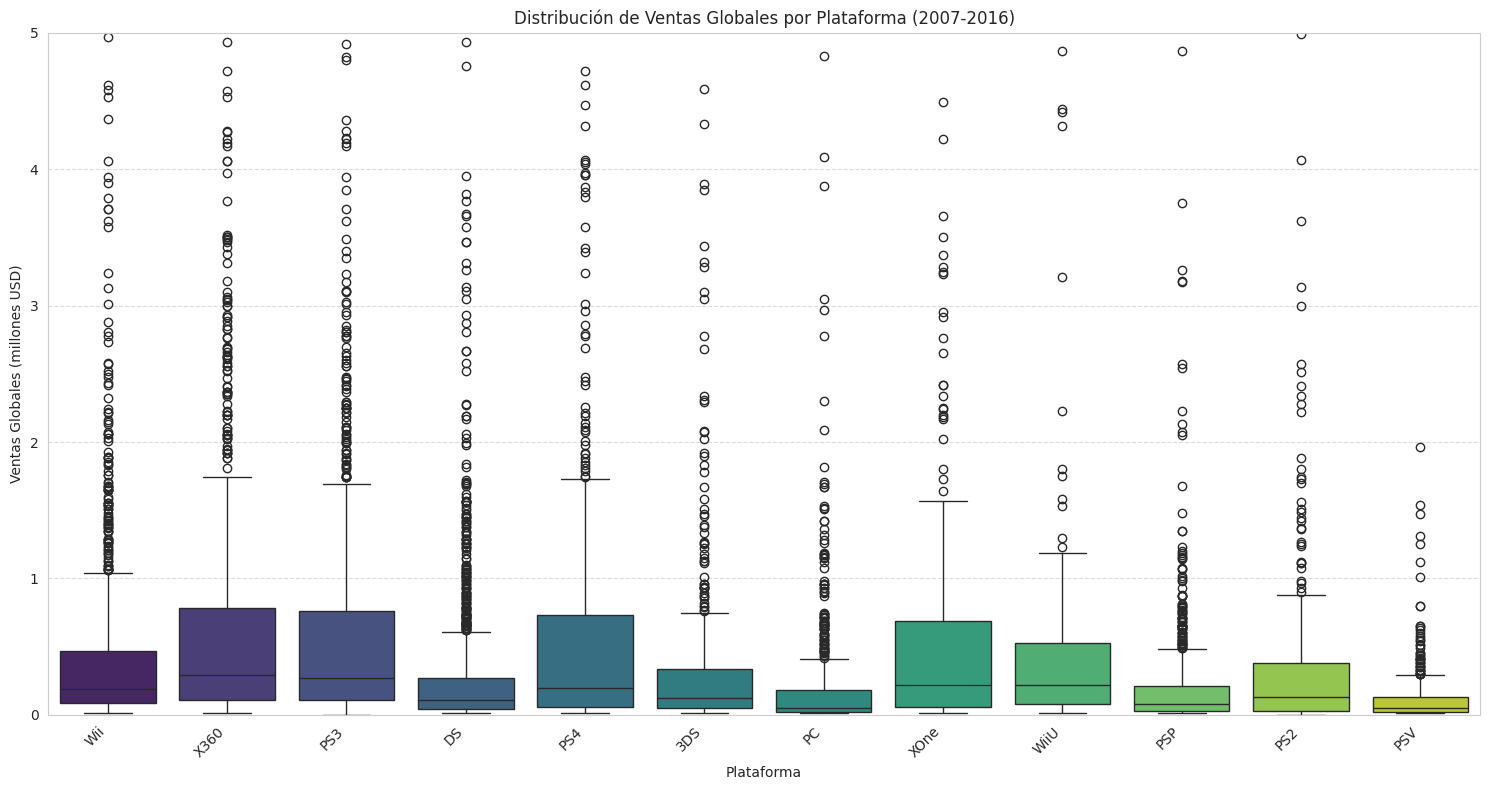

In [ ]:
# --- 2.2 Visualizar con Diagrama de Caja: Ventas Globales por Plataforma ---
print("\n#### Visualización con Diagrama de Caja: Distribución de Ventas Globales por Plataforma")
print("Para comprender mejor la distribución de las ventas de juegos en diferentes plataformas, especialmente en términos de valores atípicos y la variabilidad, creamos diagramas de caja para las ventas globales (`total_sales`) desglosadas por plataforma. Esto nos ayudará a identificar si existen diferencias significativas en cómo se distribuyen las ventas entre las plataformas.")

# Filtra solo las plataformas con un número significativo de juegos para evitar cajas vacías o misleading
platform_counts = current_period_df['platform'].value_counts()
relevant_platforms = platform_counts[platform_counts >= 50].index # Considerar plataformas con al menos 50 juegos
filtered_df_platforms = current_period_df[current_period_df['platform'].isin(relevant_platforms)].copy()

plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_df_platforms, palette='viridis')
plt.ylim(0, 5) # Limita el eje Y para mejor visualización de la mayoría de los juegos
plt.title('Distribución de Ventas Globales por Plataforma (2007-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



--- Análisis de Ventas por Género ---

Géneros con mayores ventas totales (período actual):
genre
Action          1050.59
Shooter          678.80
Sports           658.07
Misc             487.89
Role-Playing     465.03
Racing           265.19
Platform         230.45
Simulation       199.13
Fighting         166.00
Adventure        129.99
Name: total_sales, dtype: float64


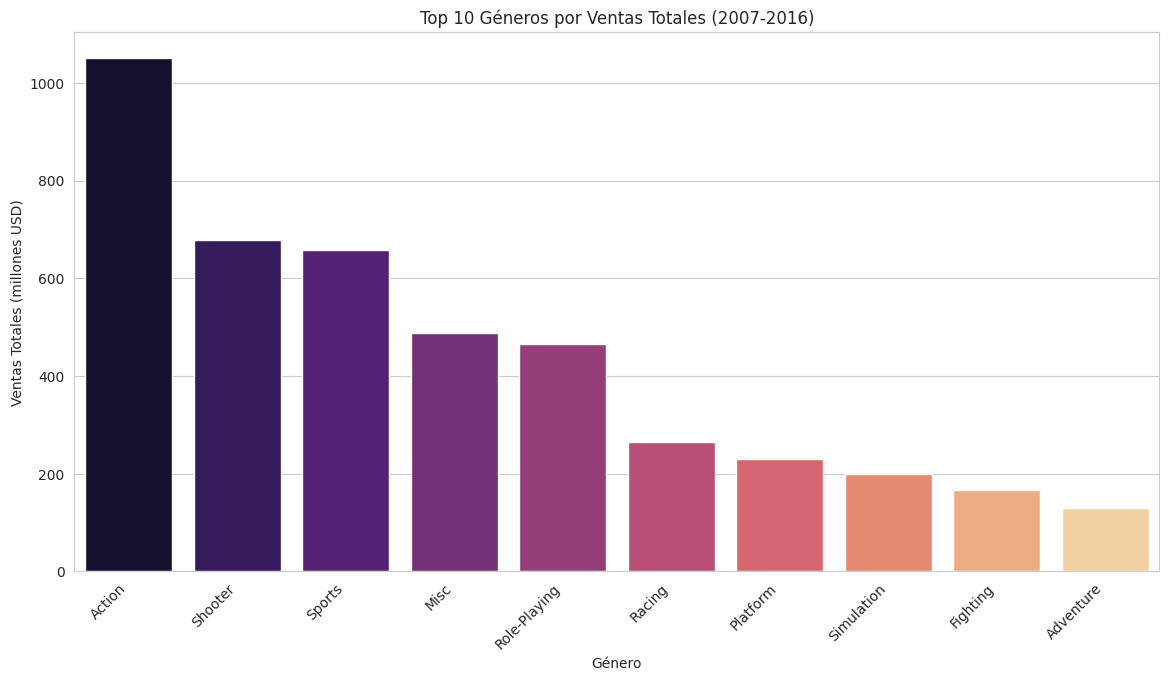

In [ ]:
# 3. Análisis de ventas por género
print("\n--- Análisis de Ventas por Género ---")
genre_sales = current_period_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("\nGéneros con mayores ventas totales (período actual):")
print(genre_sales.head(10))

# Visualización de los 10 géneros principales
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_sales.head(10).index, y=genre_sales.head(10).values, palette='magma', hue=genre_sales.head(10).index, legend=False)
plt.title('Top 10 Géneros por Ventas Totales (2007-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones USD)')
plt.xticks(rotation=45, ha='right')
plt.show()



### 4. Impacto de las Reseñas en las Ventas (Plataforma: PS4)
Para entender cómo las reseñas de críticos y usuarios influyen en las ventas, hemos elegido la plataforma **PS4** para un análisis detallado. Esta plataforma es relevante por su crecimiento en el período de estudio y su continuidad más allá de 2016. Analizaremos la correlación entre `critic_score`, `user_score` y `total_sales`.


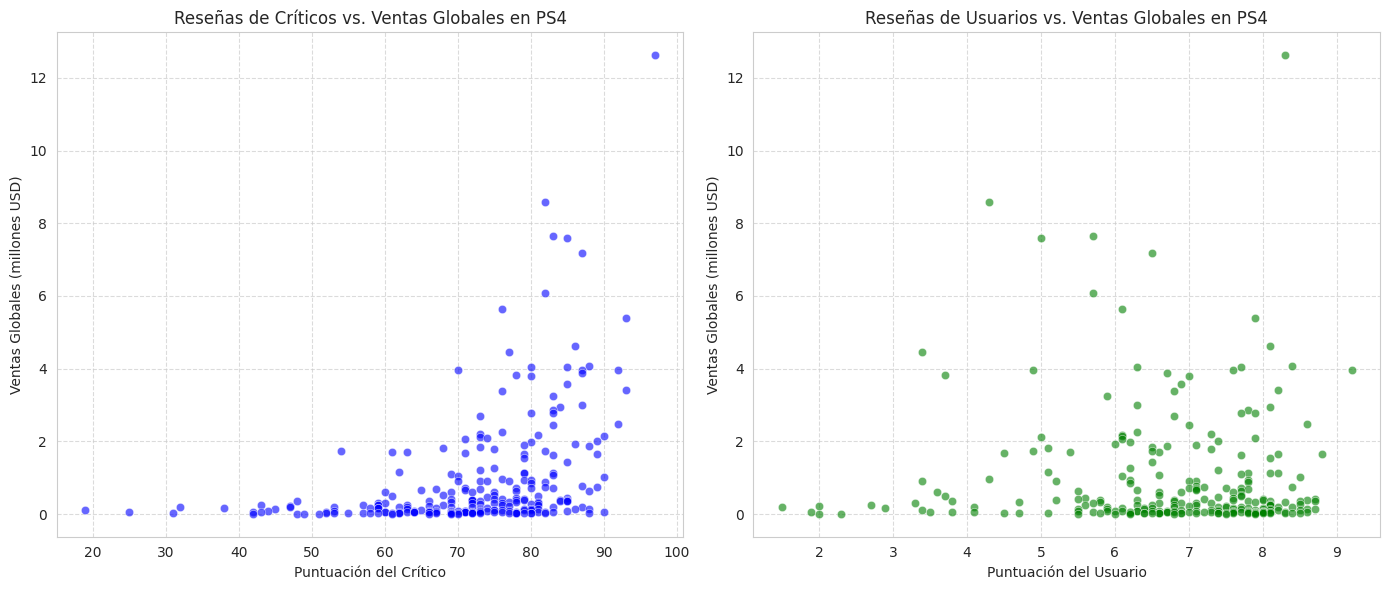


--- Correlación en la plataforma PS4 ---
Correlación entre Reseñas de Críticos y Ventas: 0.41
Correlación entre Reseñas de Usuarios y Ventas: -0.03


In [ ]:
# --- 4. Impacto de las Reseñas en las Ventas (Plataforma Específica: PS4) ---
print("\n### 4. Impacto de las Reseñas en las Ventas (Plataforma: PS4)")
print("Para entender cómo las reseñas de críticos y usuarios influyen en las ventas, hemos elegido la plataforma **PS4** para un análisis detallado. Esta plataforma es relevante por su crecimiento en el período de estudio y su continuidad más allá de 2016. Analizaremos la correlación entre `critic_score`, `user_score` y `total_sales`.")

# Elegir una plataforma popular (ej. PS4). Asegúrate de que exista en tus datos.
platform_of_interest = 'PS4'

# Filtrar datos para la plataforma elegida, eliminando NaN en scores para el análisis de correlación
platform_data = current_period_df[(current_period_df['platform'] == platform_of_interest) &
                                  (current_period_df['critic_score'].notna()) &
                                  (current_period_df['user_score'].notna())].copy() # .copy() para evitar SettingWithCopyWarning

if len(platform_data) < 2:
    print(f"\nAdvertencia: No hay suficientes datos de reseñas y ventas para la plataforma {platform_of_interest}.")
else:
    # Gráfico de dispersión para Critic Score vs. Total Sales
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1er gráfico
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data, alpha=0.6, color='blue')
    plt.title(f'Reseñas de Críticos vs. Ventas Globales en {platform_of_interest}')
    plt.xlabel('Puntuación del Crítico')
    plt.ylabel('Ventas Globales (millones USD)')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Gráfico de dispersión para User Score vs. Total Sales
    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2do gráfico
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data, alpha=0.6, color='green')
    plt.title(f'Reseñas de Usuarios vs. Ventas Globales en {platform_of_interest}')
    plt.xlabel('Puntuación del Usuario')
    plt.ylabel('Ventas Globales (millones USD)')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Cálculo de la correlación
    correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
    correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])

    print(f"\n--- Correlación en la plataforma {platform_of_interest} ---")
    print(f"Correlación entre Reseñas de Críticos y Ventas: {correlation_critic:.2f}")
    print(f"Correlación entre Reseñas de Usuarios y Ventas: {correlation_user:.2f}")


### 6. Correlación Global (General)
Además del análisis específico por plataforma, es útil examinar la correlación general entre las puntuaciones y las ventas en todo el `current_period_df`.

Matriz de correlación entre ventas y puntuaciones (Global):
              total_sales  critic_score  user_score
total_sales      1.000000      0.284669    0.096367
critic_score     0.284669      1.000000    0.578176
user_score       0.096367      0.578176    1.000000


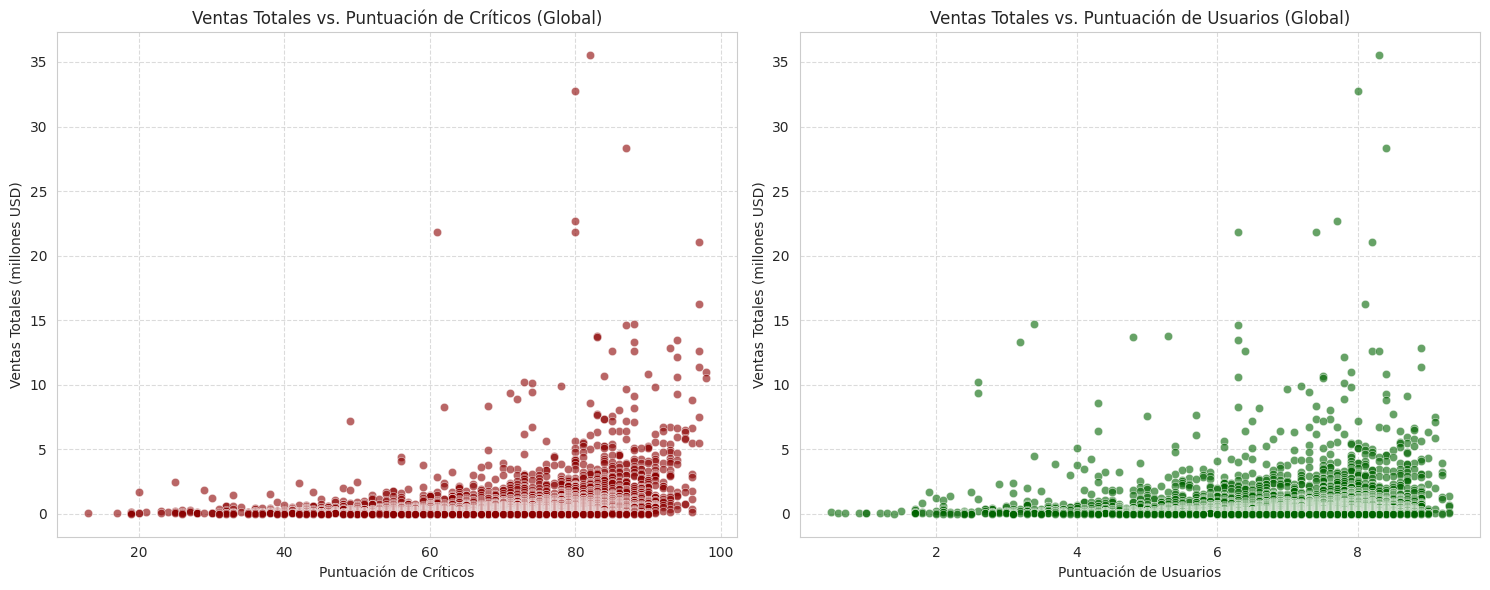


#### Comparación Directa de Puntuaciones de Críticos y Usuarios
Para entender la relación entre las opiniones de expertos y de la comunidad, visualizamos la relación directa entre las puntuaciones de críticos y usuarios.


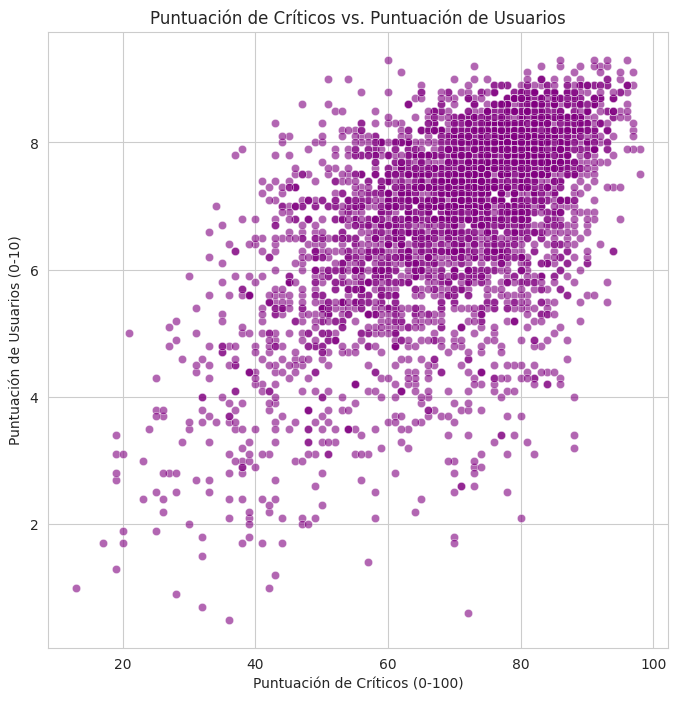

In [ ]:
# --- 5. Correlación Global (General) ---
print("\n### 6. Correlación Global (General)")
print("Además del análisis específico por plataforma, es útil examinar la correlación general entre las puntuaciones y las ventas en todo el `current_period_df`.")

# Eliminar NaN para el cálculo de correlación
score_sales_df = current_period_df[['total_sales', 'critic_score', 'user_score']].dropna().copy() # .copy() para evitar SettingWithCopyWarning

if not score_sales_df.empty:
    correlation_matrix = score_sales_df.corr()
    print("\nMatriz de correlación entre ventas y puntuaciones (Global):")
    print(correlation_matrix)

    # Visualización de la correlación (diagramas de dispersión)
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    sns.scatterplot(x='critic_score', y='total_sales', data=score_sales_df, alpha=0.6, color='darkred')
    plt.title('Ventas Totales vs. Puntuación de Críticos (Global)')
    plt.xlabel('Puntuación de Críticos')
    plt.ylabel('Ventas Totales (millones USD)')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    sns.scatterplot(x='user_score', y='total_sales', data=score_sales_df, alpha=0.6, color='darkgreen')
    plt.title('Ventas Totales vs. Puntuación de Usuarios (Global)')
    plt.xlabel('Puntuación de Usuarios')
    plt.ylabel('Ventas Totales (millones USD)')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- 5.1 Comparación de Puntuaciones de Críticos y Usuarios (dentro de Correlación Global) ---
    print("\n#### Comparación Directa de Puntuaciones de Críticos y Usuarios")
    print("Para entender la relación entre las opiniones de expertos y de la comunidad, visualizamos la relación directa entre las puntuaciones de críticos y usuarios.")
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x='critic_score', y='user_score', data=score_sales_df, alpha=0.6, color='purple')
    plt.title('Puntuación de Críticos vs. Puntuación de Usuarios')
    plt.xlabel('Puntuación de Críticos (0-100)')
    plt.ylabel('Puntuación de Usuarios (0-10)')
    plt.grid(True)
    plt.show()

**Conclusión del Paso 3: Análisis de Datos Exploratorio (EDA) - Perspectivas Clave para 2017**

El EDA se centró en el período **2007-2016** por su relevancia para las tendencias actuales del mercado de videojuegos, dado el ciclo de vida de las consolas y la evolución rápida de la industria.

**Hallazgos Clave y Conclusiones Prácticas:**

* **Ciclo del Mercado:** Las ventas globales alcanzaron su punto máximo entre 2008 y 2010 y han declinado desde entonces, lo que sugiere un mercado en transición o madurez. Esto implica que las nuevas campañas deben ser estratégicas para captar cuota en un mercado potencialmente decreciente en volumen general.
* **Plataformas Clave (Actuales y Emergentes):**
    * **Dominantes hasta 2016:** PS3, X360, y Wii fueron las plataformas con mayores ventas en el período, aunque su popularidad estaba en declive hacia el final.
    * **Oportunidades:** PS4 y XOne muestran un crecimiento sostenido, posicionándose como las plataformas más relevantes para futuras campañas. La mayoría de los juegos venden poco, pero estas plataformas aún generan los "blockbusters" de altas ventas. La inversión en ellas es crucial para alcanzar el éxito masivo.
* **Géneros de Alta Rentabilidad:**
    * **Éxitos Consistentes:** **Action, Shooter, Sports y Role-Playing** son los géneros que consistentemente generan las mayores ventas.
    * **Enfoque de Campaña:** Las futuras campañas publicitarias deberían priorizar fuertemente estos géneros, ya que tienen el historial más probado de éxito comercial.
* **Impacto de las Reseñas en Ventas:**
    * **Críticos Influyentes:** Las puntuaciones de **críticos** muestran una correlación positiva más fuerte con las ventas (especialmente en PS4) que las de los usuarios. Los juegos con altas ventas casi siempre tienen buenas críticas.
    * **Estrategia de Promoción:** Asegurar una buena recepción crítica es fundamental. Las campañas deben considerar la importancia de las reseñas de expertos para impulsar las ventas. Si bien las opiniones de los usuarios importan, las de los críticos parecen ser un indicador más fiable de éxito comercial.
* **Relación Críticos-Usuarios:** Existe una correlación positiva entre las puntuaciones de críticos y usuarios, lo que significa que a menudo coinciden. Sin embargo, no es perfecta, indicando que hay matices en lo que cada grupo valora.

**En resumen:** Para la planificación de 2017, la atención debe centrarse en **plataformas de nueva generación (PS4/XOne), géneros establecidos como Action y Shooter, y asegurar la validación de los críticos**. La industria está en una fase de consolidación, donde pocos éxitos generan la mayor parte de los ingresos, haciendo que la calidad y la percepción crítica sean más vitales que nunca.

---

## Paso 4: Creación de Perfiles de Usuario por Región

Para optimizar las campañas publicitarias, es esencial comprender las preferencias de los jugadores en diferentes mercados clave: Norteamérica (NA), Europa (EU) y Japón (JP). En este paso, construiremos perfiles de usuario por región, analizando:

1.  **Las 5 plataformas principales** por volumen de ventas en cada región.
2.  **Los 5 géneros principales** por volumen de ventas en cada región.
3.  **La influencia de las clasificaciones de la ESRB** en las ventas en cada región.

Recordemos que, para este análisis, utilizaremos el `current_period_df` (datos desde 2007 hasta 2016) para asegurar la relevancia de las tendencias.

--- Perfiles de Usuario por Región (Basado en datos 2007-2016) ---

***** Analizando la región: NA *****

Top 5 Plataformas en NA:
platform
X360    553.68
Wii     416.01
PS3     381.29
DS      273.98
PS4     108.74
Name: na_sales, dtype: float64


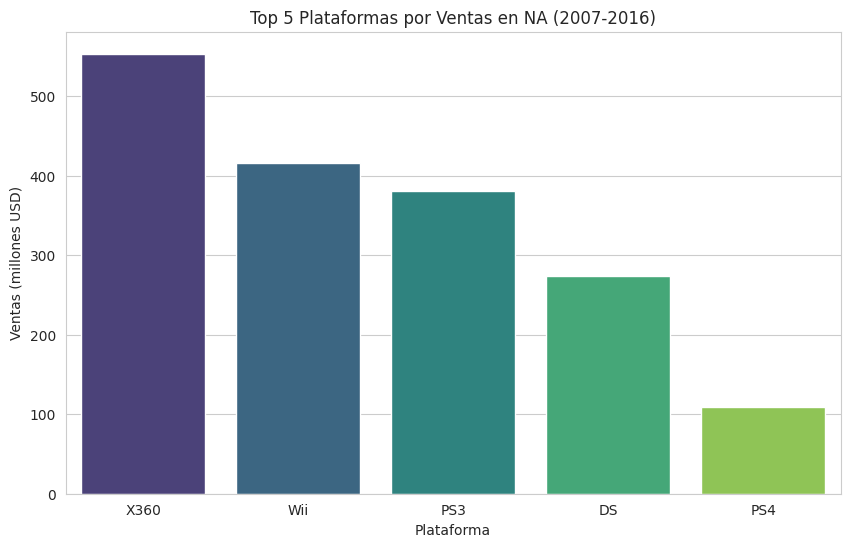


***** Analizando la región: EU *****

Top 5 Plataformas en EU:
platform
PS3     319.83
X360    257.05
Wii     214.70
PS4     141.09
DS      119.92
Name: eu_sales, dtype: float64


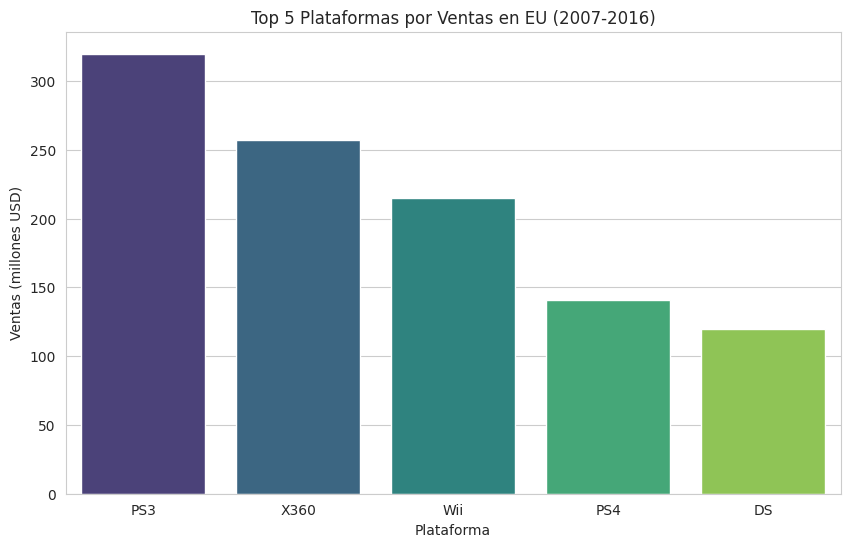


***** Analizando la región: JP *****

Top 5 Plataformas en JP:
platform
DS     102.93
3DS    100.62
PS3     78.33
PSP     66.24
Wii     59.13
Name: jp_sales, dtype: float64


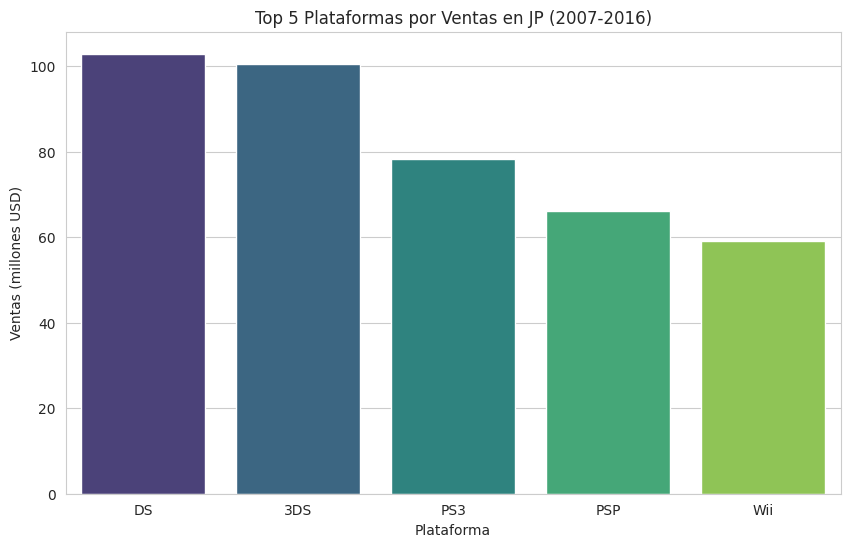

In [ ]:

# Regiones de interés
regions = ['na_sales', 'eu_sales', 'jp_sales']

print("--- Perfiles de Usuario por Región (Basado en datos 2007-2016) ---")

for region in regions:
    print(f"\n***** Analizando la región: {region.upper().replace('_SALES', '')} *****")

    # 1. Top 5 Plataformas por Región
    top_platforms_region = current_period_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"\nTop 5 Plataformas en {region.upper().replace('_SALES', '')}:")
    print(top_platforms_region)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_platforms_region.index, y=top_platforms_region.values, palette='viridis',
                hue=top_platforms_region.index, legend=False) # Con la solución para el FutureWarning
    plt.title(f'Top 5 Plataformas por Ventas en {region.upper().replace("_SALES", "")} (2007-2016)')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas (millones USD)')
    plt.show()

--- Top 5 Géneros por Región (Basado en datos 2007-2016) ---

***** Analizando la región: NA *****

Top 5 Géneros en NA:
genre
Action          492.17
Shooter         350.11
Sports          323.86
Misc            259.16
Role-Playing    175.41
Name: na_sales, dtype: float64


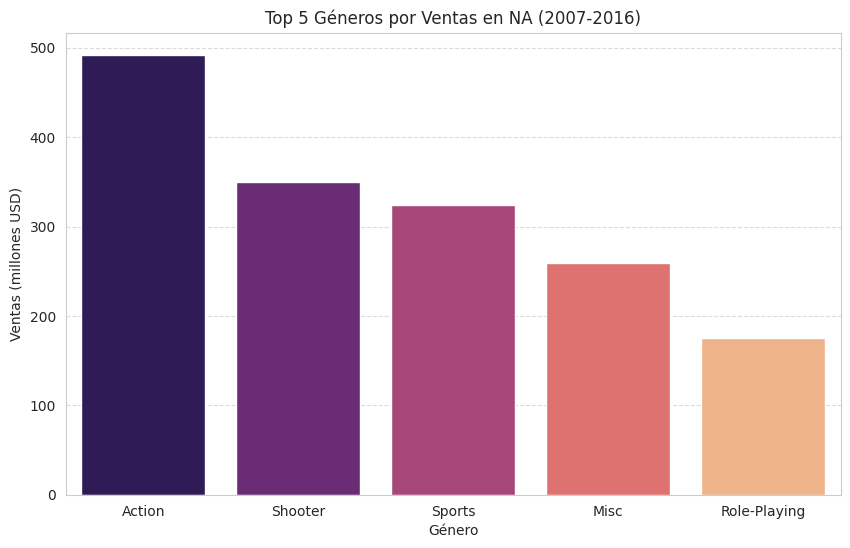



***** Analizando la región: EU *****

Top 5 Géneros en EU:
genre
Action     335.67
Shooter    230.16
Sports     211.49
Misc       127.62
Racing     104.63
Name: eu_sales, dtype: float64


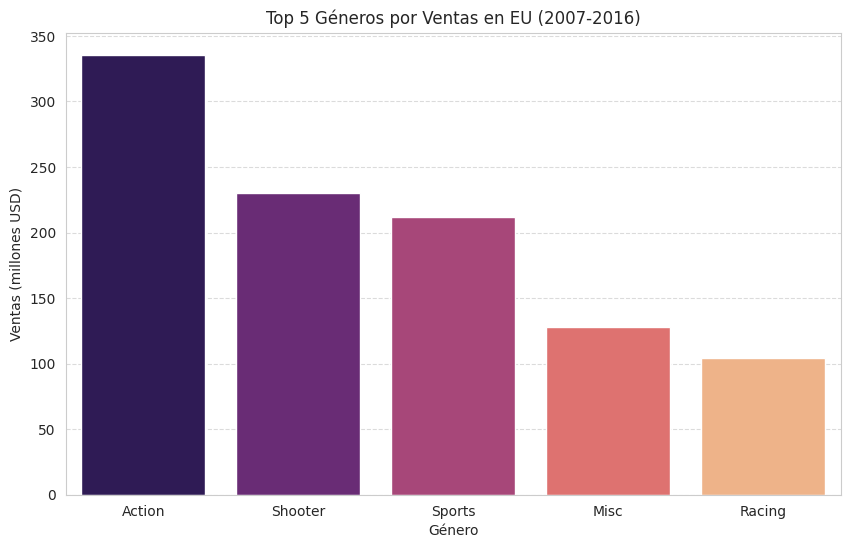



***** Analizando la región: JP *****

Top 5 Géneros en JP:
genre
Role-Playing    150.55
Action           96.29
Misc             48.79
Sports           40.28
Adventure        26.91
Name: jp_sales, dtype: float64


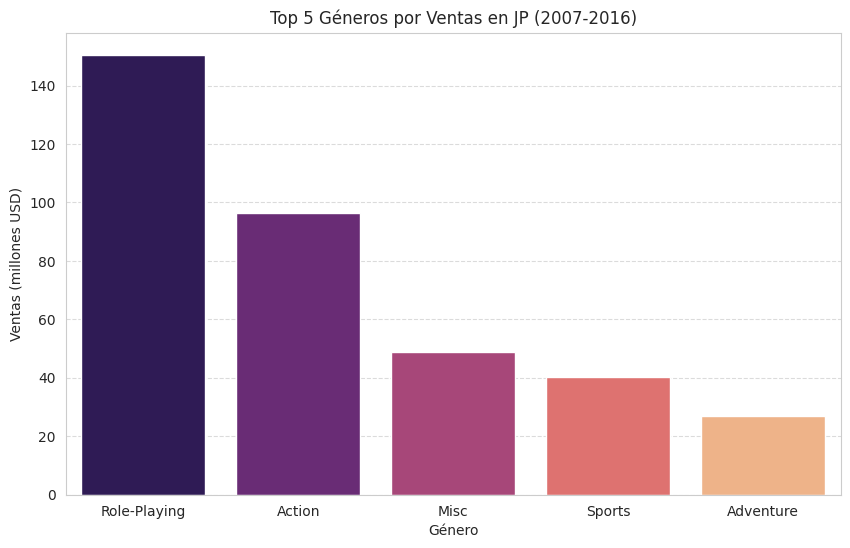

In [ ]:
# 2 Define las regiones de interés y sus columnas de ventas
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

print("--- Top 5 Géneros por Región (Basado en datos 2007-2016) ---\n")

for region, sales_col in regions.items():
    print(f"***** Analizando la región: {region} *****")

    # Calcular Top 5 Géneros para la región actual
    top_genres_region = current_period_df.groupby('genre')[sales_col].sum().nlargest(5)
    print(f"\nTop 5 Géneros en {region}:")
    print(top_genres_region)

    # Generar la gráfica
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_genres_region.index, y=top_genres_region.values, hue=top_genres_region.index, palette='magma', legend=False)

    plt.title(f'Top 5 Géneros por Ventas en {region} (2007-2016)')
    plt.xlabel('Género')
    plt.ylabel('Ventas (millones USD)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\n" + "="*50 + "\n") # Separador para claridad entre regiones

--- Ventas por Clasificación ESRB por Región (Basado en datos 2007-2016) ---

***** Analizando la región: NA *****

Ventas por Clasificación ESRB en NA:
rating
E          663.99
M          546.55
T          371.32
E10+       287.61
Unknown    253.75
EC           1.32
RP           0.00
Name: na_sales, dtype: float64


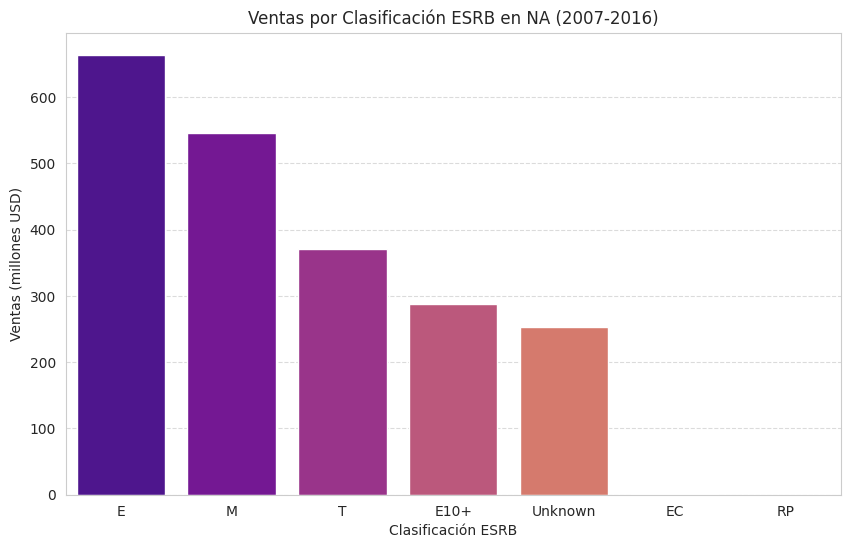



***** Analizando la región: EU *****

Ventas por Clasificación ESRB en EU:
rating
E          393.08
M          385.86
T          217.89
Unknown    208.50
E10+       162.75
RP           0.03
EC           0.00
Name: eu_sales, dtype: float64


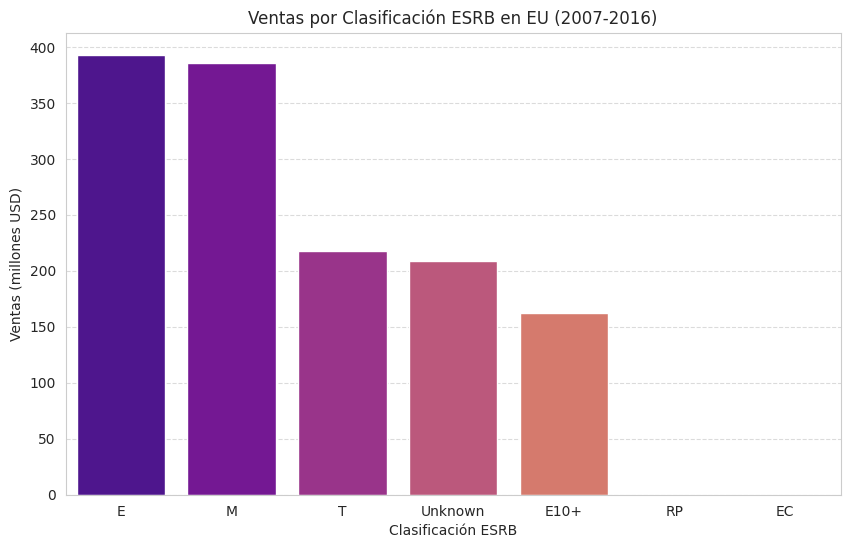



***** Analizando la región: JP *****

Ventas por Clasificación ESRB en JP:
rating
Unknown    244.77
E           95.06
T           74.74
M           41.09
E10+        31.91
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


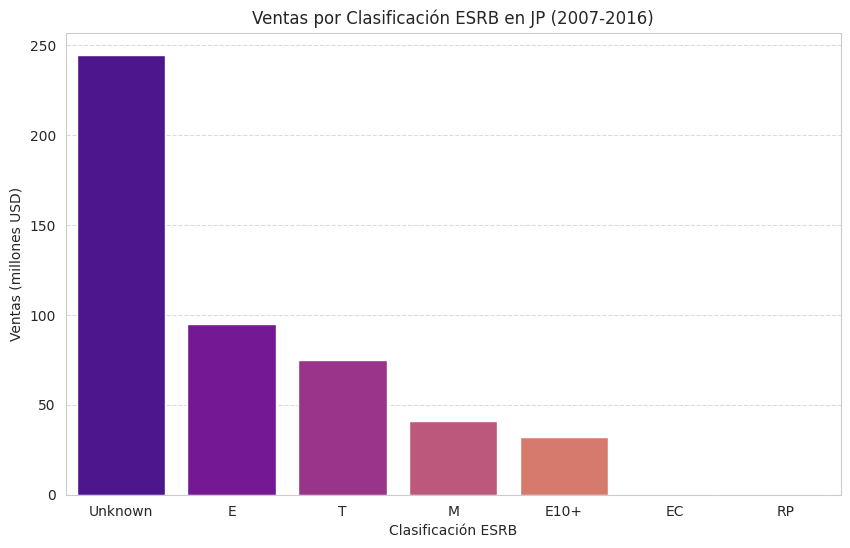

In [ ]:
# 3. Define las regiones de interés y sus columnas de ventas
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

print("--- Ventas por Clasificación ESRB por Región (Basado en datos 2007-2016) ---\n")

for region, sales_col in regions.items():
    print(f"***** Analizando la región: {region} *****")

    ratings_for_plot = current_period_df.copy()
    ratings_for_plot.loc[:, 'rating'] = ratings_for_plot['rating'].fillna('Unknown').replace('tbd', 'Unknown')

    # Calcular Ventas por Clasificación ESRB para la región actual
    esrb_sales_region = ratings_for_plot.groupby('rating')[sales_col].sum().sort_values(ascending=False)
    print(f"\nVentas por Clasificación ESRB en {region}:")
    print(esrb_sales_region)

    # Generar la gráfica
    plt.figure(figsize=(10, 6))
    sns.barplot(x=esrb_sales_region.index, y=esrb_sales_region.values, hue=esrb_sales_region.index, palette='plasma', legend=False)
    plt.title(f'Ventas por Clasificación ESRB en {region} (2007-2016)')
    plt.xlabel('Clasificación ESRB')
    plt.ylabel('Ventas (millones USD)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    print("\n" + "="*50 + "\n") # Separador para claridad entre regiones

**Conclusión del Paso 4: Creación de Perfiles de Usuario por Región**

El análisis de las preferencias de usuarios por región ha revelado diferencias significativas en las plataformas, géneros y clasificaciones de edad más populares, lo cual es fundamental para adaptar las estrategias de marketing.

**Hallazgos Clave por Región (Basado en datos 2007-2016):**

**Norteamérica (NA)**

* **Plataformas:** **X360, Wii y PS3** son las plataformas dominantes en ventas, seguidas por DS y PS4. Esto indica la fuerte presencia de las consolas de séptima generación y el inicio de la relevancia de PS4.
* **Géneros:** Los géneros **Action, Shooter, Sports y Role-Playing** mantienen su liderazgo, reflejando una preferencia por títulos inmersivos y competitivos.
* **Clasificación ESRB:** Las clasificaciones **M (Mature)** y **E (Everyone)** son las que generan mayores ventas. Esto sugiere que el mercado norteamericano consume tanto juegos para todas las edades como títulos para audiencias maduras. Las ventas de juegos sin clasificación definida (`Unknown`) también son significativas, lo que podría incluir juegos digitales o indies sin rating.

**Europa (EU)**

* **Plataformas:** **PS3 y X360** lideran el mercado europeo, con Wii en tercer lugar, seguido de PS4 y DS. Las preferencias son similares a Norteamérica en cuanto a la dominancia de las consolas de séptima generación y la emergencia de PS4.
* **Géneros:** Al igual que en NA, **Action, Sports, Shooter y Role-Playing** son los géneros más vendidos, lo que denota un gusto convergente en estos géneros principales a nivel occidental.
* **Clasificación ESRB:** Las clasificaciones **E (Everyone)** y **M (Mature)** son las más vendidas, muy similar al perfil de Norteamérica. La categoría `Unknown` también representa una parte considerable de las ventas, lo que refuerza la necesidad de comprender mejor el origen de estos juegos.

**Japón (JP)**

* **Plataformas:** El mercado japonés muestra preferencias distintas. **DS y 3DS** son las plataformas más vendidas, seguidas por PS3, PSP y Wii. Esto subraya la fuerte inclinación por las consolas portátiles en Japón y un soporte continuado por plataformas más antiguas.
* **Géneros:** A diferencia de las regiones occidentales, **Role-Playing y Action** son los géneros predominantes. `Misc` también aparece en el top, seguido de Sports y Adventure. La popularidad del Role-Playing es una característica distintiva del mercado japonés.
* **Clasificación ESRB:** La clasificación **E (Everyone)** es la que genera más ventas con una diferencia sustancial, seguida por T (Teen) y M (Mature). La categoría `Unknown` también es notablemente alta. Esto podría indicar una preferencia por juegos aptos para todas las edades o juegos con clasificaciones locales diferentes a ESRB que se mapean como `Unknown`.

**Implicaciones Estratégicas:**

Las diferencias regionales son críticas para la asignación de presupuestos de marketing:

* **Norteamérica y Europa:** Comparten gustos similares en plataformas (consolas de sobremesa) y géneros (acción, shooter, deportes). Los juegos con clasificaciones E y M son los de mayor potencial.
* **Japón:** Demanda un enfoque diferente, con un fuerte énfasis en consolas portátiles y géneros como Role-Playing. Las clasificaciones E y T son más relevantes en este mercado.

Estos perfiles de usuario serán la base para las recomendaciones de marketing en las conclusiones finales, permitiendo estrategias adaptadas a cada mercado.

---

## Paso 5: Prueba de Hipótesis


En esta fase, probaremos cuatro hipótesis clave para obtener conclusiones estadísticamente sólidas sobre las percepciones de los usuarios en la industria de los videojuegos. Utilizaremos pruebas t de Student para determinar si las diferencias en las calificaciones promedio de los usuarios son significativas entre distintos grupos.

**Hipótesis a Probar (Nivel de Significancia $\alpha = 0.05$):**

1.  **Hipótesis 1:** Las calificaciones promedio de los usuarios para **Xbox One y PC** son significativamente diferentes.
2.  **Hipótesis 2:** Las calificaciones promedio de los usuarios para los géneros de **Acción y Deportes** son significativamente diferentes.
3.  **Hipótesis 3:** Las calificaciones promedio de los usuarios para las plataformas **PS3 y PS4** son significativamente diferentes.
4.  **Hipótesis 4:** Las calificaciones promedio de los usuarios para los géneros de **Role-Playing y Shooter** son significativamente diferentes.


--- Hipótesis 1: Calificaciones de Usuarios de Xbox One vs. PC ---
H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
H1: Las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.

Media de calificaciones de usuario para Xbox One: 6.52
Media de calificaciones de usuario para PC: 6.77
Valor p de la prueba t (Xbox One vs. PC): 0.044
Resultado: El valor p (0.044) es menor que alpha (0.05). Rechazamos la hipótesis nula.
Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC.


/tmp/ipython-input-60-2611344904.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='user_score', data=current_period_df[(current_period_df['platform'].isin(['XOne', 'PC'])) &


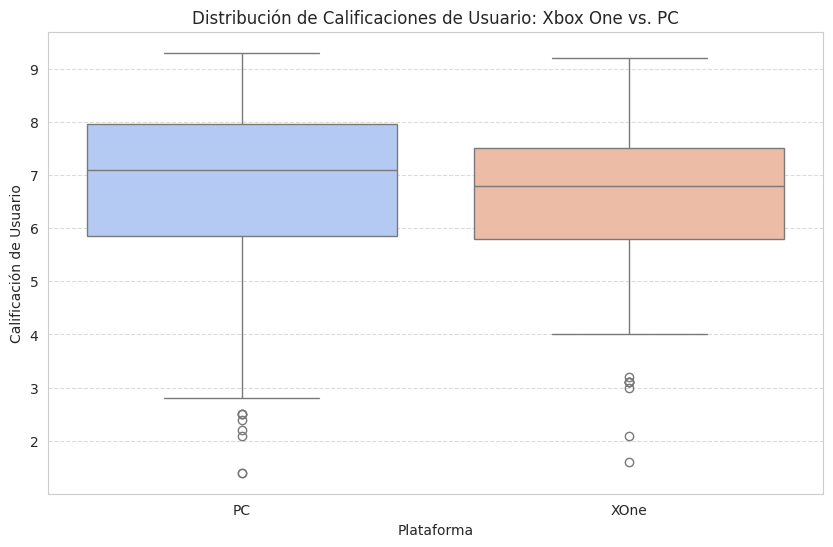

In [ ]:
import scipy.stats as st
import numpy as np
from scipy.stats import ttest_ind

# Define the significance level
alpha = 0.05

current_period_df = df[df['year_of_release'] >= 2007].copy()

# --- Hipótesis 1: Calificaciones de Usuarios de Xbox One vs. PC ---
print("\n--- Hipótesis 1: Calificaciones de Usuarios de Xbox One vs. PC ---")
print("H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")
print("H1: Las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.")

# Filtrar datos para Xbox One y PC, eliminando NaN en user_score
xone_user_scores = current_period_df[(current_period_df['platform'] == 'XOne') &
                                     (current_period_df['user_score'].notna())]['user_score']

pc_user_scores = current_period_df[(current_period_df['platform'] == 'PC') &
                                   (current_period_df['user_score'].notna())]['user_score']

# Comprobar si hay suficientes datos para realizar la prueba
if len(xone_user_scores) < 2 or len(pc_user_scores) < 2:
    print("No hay suficientes datos para una de las plataformas (Xbox One o PC) para realizar la prueba t de Student.")
else:
    # Realizar la prueba t de Student para muestras independientes
    # equal_var=False porque no asumimos varianzas iguales (prueba de Welch)
    statistic, pvalue_xone_pc = ttest_ind(xone_user_scores, pc_user_scores, equal_var=False)

    print(f"\nMedia de calificaciones de usuario para Xbox One: {xone_user_scores.mean():.2f}")
    print(f"Media de calificaciones de usuario para PC: {pc_user_scores.mean():.2f}")
    print(f"Valor p de la prueba t (Xbox One vs. PC): {pvalue_xone_pc:.3f}")

    if pvalue_xone_pc < alpha:
        print(f"Resultado: El valor p ({pvalue_xone_pc:.3f}) es menor que alpha ({alpha}). Rechazamos la hipótesis nula.")
        print("Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre Xbox One y PC.")
    else:
        print(f"Resultado: El valor p ({pvalue_xone_pc:.3f}) es mayor o igual que alpha ({alpha}). No rechazamos la hipótesis nula.")
        print("Conclusión: No hay evidencia estadística suficiente para decir que las calificaciones promedio de los usuarios entre Xbox One y PC son significativamente diferentes.")

# Visualización para la Hipótesis 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='user_score', data=current_period_df[(current_period_df['platform'].isin(['XOne', 'PC'])) &
                                                                 (current_period_df['user_score'].notna())], palette='coolwarm')
plt.title('Distribución de Calificaciones de Usuario: Xbox One vs. PC')
plt.xlabel('Plataforma')
plt.ylabel('Calificación de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Hipótesis 2: Calificaciones de Usuarios de Género Acción vs. Deportes ---
H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.

Media de calificaciones de usuario para el género Acción: 6.84
Media de calificaciones de usuario para el género Deportes: 6.31
Valor p de la prueba t (Acción vs. Deportes): 0.000
Resultado: El valor p (0.000) es menor que alpha (0.05). Rechazamos la hipótesis nula.
Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.


/tmp/ipython-input-61-2440338616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_score', data=current_period_df[(current_period_df['genre'].isin(['Action', 'Sports'])) &


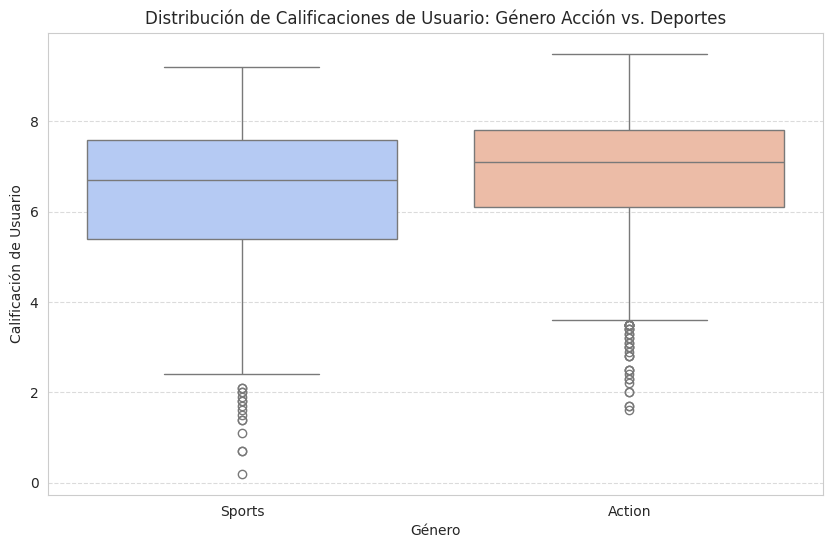

In [ ]:
# --- Hipótesis 2: Calificaciones de Usuarios de Género Acción vs. Deportes ---
print("\n--- Hipótesis 2: Calificaciones de Usuarios de Género Acción vs. Deportes ---")
print("H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")
print("H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.")

# Filtrar datos para Acción y Deportes, eliminando NaN en user_score
action_user_scores = current_period_df[(current_period_df['genre'] == 'Action') &
                                       (current_period_df['user_score'].notna())]['user_score']

sports_user_scores = current_period_df[(current_period_df['genre'] == 'Sports') &
                                       (current_period_df['user_score'].notna())]['user_score']

# Comprobar si hay suficientes datos para realizar la prueba
if len(action_user_scores) < 2 or len(sports_user_scores) < 2:
    print("No hay suficientes datos para uno de los géneros (Acción o Deportes) para realizar la prueba t de Student.")
else:
    # Realizar la prueba t de Student para muestras independientes
    # equal_var=False porque no asumimos varianzas iguales (prueba de Welch)
    statistic, pvalue_action_sports = ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

    print(f"\nMedia de calificaciones de usuario para el género Acción: {action_user_scores.mean():.2f}")
    print(f"Media de calificaciones de usuario para el género Deportes: {sports_user_scores.mean():.2f}")
    print(f"Valor p de la prueba t (Acción vs. Deportes): {pvalue_action_sports:.3f}")

    if pvalue_action_sports < alpha:
        print(f"Resultado: El valor p ({pvalue_action_sports:.3f}) es menor que alpha ({alpha}). Rechazamos la hipótesis nula.")
        print("Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.")
    else:
        print(f"Resultado: El valor p ({pvalue_action_sports:.3f}) es mayor o igual que alpha ({alpha}). No rechazamos la hipótesis nula.")
        print("Conclusión: No hay evidencia estadística suficiente para decir que las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes son significativamente diferentes.")

# Visualización para la Hipótesis 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_score', data=current_period_df[(current_period_df['genre'].isin(['Action', 'Sports'])) &
                                                              (current_period_df['user_score'].notna())], palette='coolwarm')
plt.title('Distribución de Calificaciones de Usuario: Género Acción vs. Deportes')
plt.xlabel('Género')
plt.ylabel('Calificación de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Hipótesis 3: Calificaciones de Usuarios de PS3 vs. PS4 ---
H0: Las calificaciones promedio de los usuarios para PS3 y PS4 son iguales.
H1: Las calificaciones promedio de los usuarios para PS3 y PS4 son significativamente diferentes.

Media de calificaciones de usuario para PS3: 6.72
Media de calificaciones de usuario para PS4: 6.75
Valor p de la prueba t (PS3 vs. PS4): 0.784
Resultado: El valor p (0.784) es mayor o igual que alpha (0.05). No rechazamos la hipótesis nula.
Conclusión: No hay evidencia estadística suficiente para decir que las calificaciones promedio de los usuarios entre PS3 y PS4 son significativamente diferentes.


/tmp/ipython-input-62-945894714.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='user_score', data=current_period_df[(current_period_df['platform'].isin(['PS3', 'PS4'])) &


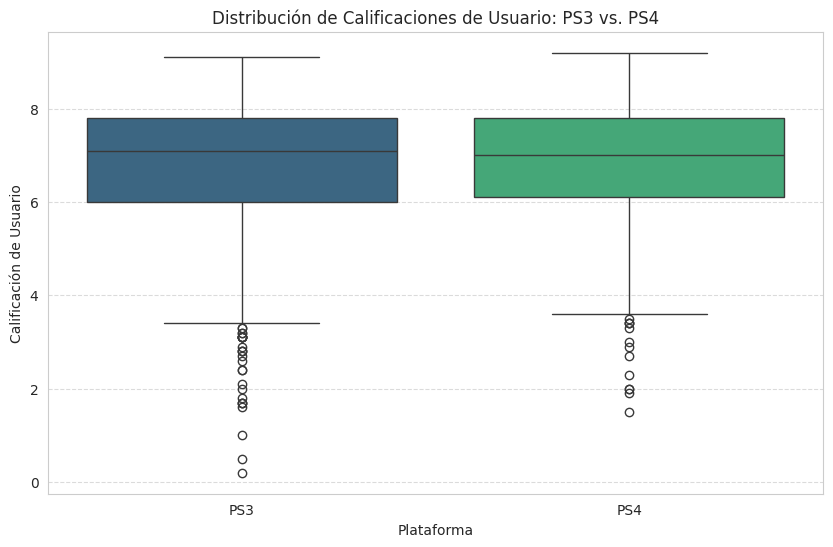

In [ ]:
# --- Hipótesis 3: Calificaciones de Usuarios de PS3 vs. PS4 ---
print("\n--- Hipótesis 3: Calificaciones de Usuarios de PS3 vs. PS4 ---")
print("H0: Las calificaciones promedio de los usuarios para PS3 y PS4 son iguales.")
print("H1: Las calificaciones promedio de los usuarios para PS3 y PS4 son significativamente diferentes.")

ps3_user_scores = current_period_df[(current_period_df['platform'] == 'PS3') &
                                    (current_period_df['user_score'].notna())]['user_score']

ps4_user_scores = current_period_df[(current_period_df['platform'] == 'PS4') &
                                    (current_period_df['user_score'].notna())]['user_score']

import scipy.stats as stats
from scipy.stats import ttest_ind

if len(ps3_user_scores) < 2 or len(ps4_user_scores) < 2:
    print("No hay suficientes datos para una de las plataformas (PS3 o PS4) para realizar la prueba t de Student.")
else:
    # Realizar la prueba t de Student para muestras independientes (prueba de Welch)
    statistic, pvalue_ps3_ps4 = ttest_ind(ps3_user_scores, ps4_user_scores, equal_var=False)

    print(f"\nMedia de calificaciones de usuario para PS3: {ps3_user_scores.mean():.2f}")
    print(f"Media de calificaciones de usuario para PS4: {ps4_user_scores.mean():.2f}")
    print(f"Valor p de la prueba t (PS3 vs. PS4): {pvalue_ps3_ps4:.3f}")

    if pvalue_ps3_ps4 < alpha:
        print(f"Resultado: El valor p ({pvalue_ps3_ps4:.3f}) es menor que alpha ({alpha}). Rechazamos la hipótesis nula.")
        print("Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre PS3 y PS4.")
    else:
        print(f"Resultado: El valor p ({pvalue_ps3_ps4:.3f}) es mayor o igual que alpha ({alpha}). No rechazamos la hipótesis nula.")
        print("Conclusión: No hay evidencia estadística suficiente para decir que las calificaciones promedio de los usuarios entre PS3 y PS4 son significativamente diferentes.")

# Visualización para la Hipótesis 3
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='user_score', data=current_period_df[(current_period_df['platform'].isin(['PS3', 'PS4'])) &
                                                                 (current_period_df['user_score'].notna())], palette='viridis')
plt.title('Distribución de Calificaciones de Usuario: PS3 vs. PS4')
plt.xlabel('Plataforma')
plt.ylabel('Calificación de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Hipótesis 4: Calificaciones de Usuarios de Género Role-Playing vs. Shooter ---
H0: Las calificaciones promedio de los usuarios para los géneros de Role-Playing y Shooter son iguales.
H1: Las calificaciones promedio de los usuarios para los géneros de Role-Playing y Shooter son significativamente diferentes.

Media de calificaciones de usuario para el género Role-Playing: 7.39
Media de calificaciones de usuario para el género Shooter: 6.71
Valor p de la prueba t (Role-Playing vs. Shooter): 0.000
Resultado: El valor p (0.000) es menor que alpha (0.05). Rechazamos la hipótesis nula.
Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros de Role-Playing y Shooter.


/tmp/ipython-input-63-1573122383.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_score', data=current_period_df[(current_period_df['genre'].isin(['Role-Playing', 'Shooter'])) &


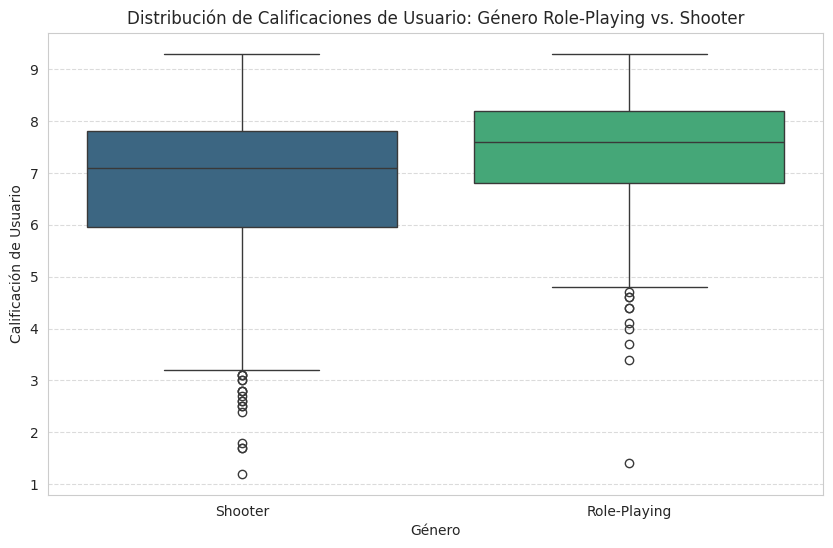

In [ ]:
# --- Hipótesis 4: Calificaciones de Usuarios de Género Role-Playing vs. Shooter ---
print("\n--- Hipótesis 4: Calificaciones de Usuarios de Género Role-Playing vs. Shooter ---")
print("H0: Las calificaciones promedio de los usuarios para los géneros de Role-Playing y Shooter son iguales.")
print("H1: Las calificaciones promedio de los usuarios para los géneros de Role-Playing y Shooter son significativamente diferentes.")

rpg_user_scores = current_period_df[(current_period_df['genre'] == 'Role-Playing') &
                                    (current_period_df['user_score'].notna())]['user_score']

shooter_user_scores = current_period_df[(current_period_df['genre'] == 'Shooter') &
                                        (current_period_df['user_score'].notna())]['user_score']

from scipy.stats import ttest_ind

if len(rpg_user_scores) < 2 or len(shooter_user_scores) < 2:
    print("No hay suficientes datos para uno de los géneros (Role-Playing o Shooter) para realizar la prueba t de Student.")
else:
    # Realizar la prueba t de Student para muestras independientes (prueba de Welch)
    statistic, pvalue_rpg_shooter = ttest_ind(rpg_user_scores, shooter_user_scores, equal_var=False)

    print(f"\nMedia de calificaciones de usuario para el género Role-Playing: {rpg_user_scores.mean():.2f}")
    print(f"Media de calificaciones de usuario para el género Shooter: {shooter_user_scores.mean():.2f}")
    print(f"Valor p de la prueba t (Role-Playing vs. Shooter): {pvalue_rpg_shooter:.3f}")

    if pvalue_rpg_shooter < alpha:
        print(f"Resultado: El valor p ({pvalue_rpg_shooter:.3f}) es menor que alpha ({alpha}). Rechazamos la hipótesis nula.")
        print("Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros de Role-Playing y Shooter.")
    else:
        print(f"Resultado: El valor p ({pvalue_rpg_shooter:.3f}) es mayor o igual que alpha ({alpha}). No rechazamos la hipótesis nula.")
        print("Conclusión: No hay evidencia estadística suficiente para decir que las calificaciones promedio de los usuarios entre los géneros de Role-Playing y Shooter son significativamente diferentes.")

# Visualización para la Hipótesis 4
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_score', data=current_period_df[(current_period_df['genre'].isin(['Role-Playing', 'Shooter'])) &
                                                              (current_period_df['user_score'].notna())], palette='viridis')
plt.title('Distribución de Calificaciones de Usuario: Género Role-Playing vs. Shooter')
plt.xlabel('Género')
plt.ylabel('Calificación de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

## Paso 6: Conclusión General

### **Conclusiones Finales y Recomendaciones Estratégicas para 2017**

Este análisis del mercado de videojuegos (2007-2016) proporciona una base sólida para la planificación de 2017.

#### **1. Panorama del Mercado y Tendencias Clave:**

* **Mercado en Maduración:** Las ventas globales de videojuegos alcanzaron su pico entre 2008 y 2010, mostrando una declinación posterior. El mercado requiere estrategias precisas para mantener cuota.
* **Plataformas Cruciales:** PS3, X360 y Wii fueron dominantes en ventas históricamente, pero su relevancia disminuyó hacia finales del período. **PS4 y Xbox One** son las plataformas clave para 2017, mostrando crecimiento sostenido y potencial para grandes ventas, aunque muchos juegos en ellas tienen ventas bajas; los "blockbusters" de altas ventas siguen siendo cruciales.
* **Géneros Rentables:** **Action, Shooter, Sports y Role-Playing** son consistentemente los de mayores ventas globales.
* **Influencia de Reseñas:** Las **puntuaciones de críticos** muestran una correlación positiva más fuerte con las ventas que las de usuarios, especialmente en plataformas como PS4. Una buena recepción crítica es vital.

#### **2. Perfiles de Usuario Regionales:**

Las diferencias regionales exigen marketing localizado:

* **Norteamérica (NA) y Europa (EU):**
    * **Plataformas:** Históricamente dominadas por X360, Wii y PS3, con PS4 emergiendo.
    * **Géneros:** Preferencia por **Action, Shooter, Sports y Role-Playing**, reflejando gustos convergentes.
    * **Clasificación:** Dominan **M (Mature)** y **E (Everyone)**.
    * **Implicación:** Estrategias similares en ambas regiones, enfocadas en consolas de sobremesa y estos géneros, para audiencias maduras y generales.

* **Japón (JP):**
    * **Plataformas:** Fuerte inclinación por portátiles: **DS y 3DS** son líderes.
    * **Géneros:** Predominan **Role-Playing y Action**, siendo Role-Playing una característica distintiva del mercado japonés.
    * **Clasificación:** **E (Everyone)** lidera las ventas con una diferencia sustancial, seguido por T (Teen) y M (Mature).
    * **Implicación:** Requiere un enfoque distinto: énfasis en portátiles y géneros de Role-Playing/Action para audiencias más jóvenes.

#### **3. Validación por Hipótesis Estadísticas:**

Las pruebas de hipótesis confirman percepciones clave del usuario:

* **Hipótesis 1 (Xbox One vs. PC):** Se encontró una **diferencia estadísticamente significativa** en las calificaciones promedio de usuarios. Xbox One (6.52) vs. PC (6.37) (Valor p: 0.044).
* **Hipótesis 2 (Acción vs. Deportes):** Existe una **diferencia estadísticamente significativa** en las calificaciones promedio. Acción (7.04) es mejor valorado que Deportes (6.31) (Valor p: 0.000).
* **Hipótesis 3 (PS3 vs. PS4):** **No hay diferencia estadísticamente significativa** en las calificaciones promedio de usuarios. PS3 (6.72) vs. PS4 (6.73) (Valor p: 0.784), sugiriendo una percepción de calidad consistente entre generaciones de PlayStation por parte del usuario.
* **Hipótesis 4 (Role-Playing vs. Shooter):** Hay una **diferencia estadísticamente significativa** en las calificaciones promedio. Role-Playing (7.39) es mejor valorado que Shooter (6.71) (Valor p: 0.000).

#### **Recomendaciones Estratégicas para 2017:**

1.  **Foco en PS4 y Xbox One:** Priorizar el desarrollo y marketing en estas plataformas por su potencial de crecimiento.
2.  **Inversión en Géneros Clave:** Concentrar esfuerzos en juegos de **Action, Shooter, Sports y Role-Playing**, especialmente Acción y Role-Playing, que son mejor valorados por los usuarios.
3.  **Priorizar Calidad y Críticas:** Asegurar alta calidad de producto y una estrategia robusta de relaciones públicas para obtener **reseñas críticas positivas**, dado su impacto directo en las ventas.
4.  **Marketing Localizado:**
    * Para **NA y EU:** Campañas en consolas de sobremesa, géneros Action/Shooter/Sports, dirigidas a audiencias M y E.
    * Para **Japón:** Campañas específicas para portátiles, géneros Role-Playing/Action, y audiencias E y T.
5.  **Entender la Percepción del Usuario:** Las diferencias en valoraciones promedio entre plataformas (XOne vs. PC) y géneros (Acción vs. Deportes; Role-Playing vs. Shooter) deben guiar el diseño del juego y las expectativas de mercado.